### Problem Statement:
##### Classifying the msrp of car prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Acquisition


In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

##### Features
##### For the rest of the homework, you'll need to use only these columns:

##### (Make,  Model,Year,Engine HP, Engine Cylinders, Transmission Type, Vehicle Style, highway MPG, city mpg,MSRP)

##### Select only the features from above and transform their names using the next line:
##### Fill in the missing values of the selected features with 0.
##### Rename MSRP variable to price.

### Data Preparation

In [5]:
df = df[['Make','Model','Year','Engine HP', 
              'Engine Cylinders', 'Transmission Type', 
              'Vehicle Style', 'highway MPG', 'city mpg','MSRP']]

In [6]:
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [8]:
df.rename(columns = {'msrp': 'price'}, inplace = True)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

### Question 1
##### What is the most frequent observation (mode) for the column transmission_type?

##### AUTOMATIC
##### MANUAL
#### AUTOMATED_MANUAL
#### DIRECT_DRIVE

In [9]:
df.transmission_type[df.transmission_type.value_counts().max()]

'AUTOMATIC'

### Question 2
###### Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

###### What are the two features that have the biggest correlation in this dataset?

###### engine_hp and year
###### engine_hp and engine_cylinders
###### highway_mpg and engine_cylinders
###### highway_mpg and city_mpg



In [10]:
#specify the numeric columns
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [11]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [12]:
numeric = ['year', 'engine_hp','engine_cylinders','highway_mpg', 'city_mpg']

In [13]:
df[numeric]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18
...,...,...,...,...,...
11909,2012,300.0,6.0,23,16
11910,2012,300.0,6.0,23,16
11911,2012,300.0,6.0,23,16
11912,2013,300.0,6.0,23,16


In [14]:
corr_matrix = df[numeric].corr()

In [15]:
corr_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.351794,-0.041479,0.258240,0.198171
engine_hp,0.351794,1.000000,0.779988,-0.406563,-0.439371
engine_cylinders,-0.041479,0.779988,1.000000,-0.621606,-0.600776
highway_mpg,0.258240,-0.406563,-0.621606,1.000000,0.886829
city_mpg,0.198171,-0.439371,-0.600776,0.886829,1.000000


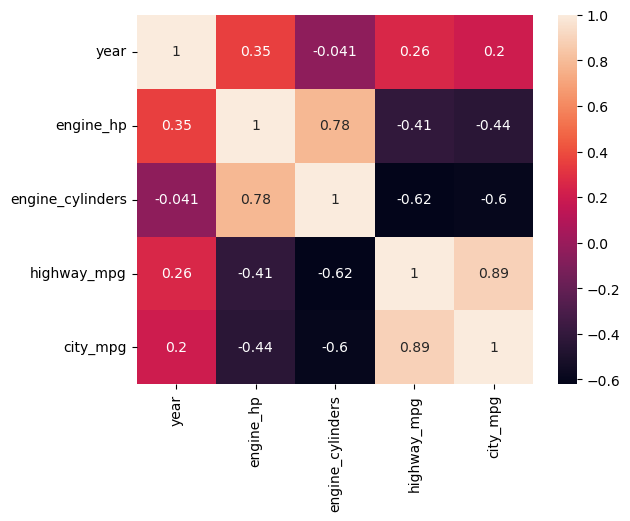

In [16]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Make price binary
###### Now we need to turn the price variable from numeric into a binary format.
###### Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [17]:
df.price.value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: price, Length: 6049, dtype: int64

In [18]:
values = list(df.price.values)
mean = df['price'].mean()

In [19]:
def above_average(val):
    if val > mean:
        return 1
    else:
        return 0

In [20]:
df['above_average'] = df['price'].map(above_average)
df.above_average.value_counts(normalize=True)

0    0.725617
1    0.274383
Name: above_average, dtype: float64

In [21]:
above_avg_rate = df.above_average.mean()
above_avg_rate

0.27438307873090484

### Split the data
###### Split your data in train/val/test sets with 60%/20%/20% distribution.
###### Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
###### Make sure that the target value (above_average) is not in your dataframe.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_full_train, df_test = train_test_split(df, test_size =0.2, random_state=42)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state= 42)

In [25]:
len(df_full_train), len(df_train), len(df_test), len(df_val)

(9531, 7148, 2383, 2383)

In [26]:
#reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
#split the above_average column from the rest of the dataframe
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [28]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 3
##### Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
##### Round the scores to 2 decimals using round(score, 2).
##### Which of these variables has the lowest mutual information score?

In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
categorical = ['make', 'model','transmission_type','vehicle_style']
df_full_train[categorical]

,make,model,transmission_type,vehicle_style
3181,Cadillac,CT6,AUTOMATIC,Sedan
5357,Mercedes-Benz,GLS-Class,AUTOMATIC,4dr SUV
4874,Kia,Forte,AUTOMATIC,Coupe
8102,Dodge,RAM 250,MANUAL,Regular Cab Pickup
10400,Hyundai,Tiburon,AUTOMATIC,2dr Hatchback
...,...,...,...,...
11284,Toyota,Venza,AUTOMATIC,Wagon
5191,Pontiac,G6,AUTOMATIC,Sedan
5390,Volkswagen,Golf GTI,AUTOMATED_MANUAL,2dr Hatchback
860,Saab,9-5,AUTOMATIC,Wagon


In [31]:
def mutual_above_average_info_score(series):
    return mutual_info_score(series, df_full_train.above_average)
    

In [32]:
df_full_train[categorical].apply(mutual_above_average_info_score).round(2)

make                 0.24
model                0.46
transmission_type    0.02
vehicle_style        0.08
dtype: float64

### Question 4
##### Now let's train a logistic regression.
#####  Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
#####  Fit the model on the training dataset.
#####  To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#####  model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
#####  Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
##### What accuracy did you get?

In [33]:
df_train = df_train.fillna(0)

In [34]:
df_val = df_val.fillna(0)

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
train_dicts = df_train[categorical + numeric].to_dict(orient='records')

In [37]:
dv = DictVectorizer(sparse=False)

In [38]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [39]:
X_train.shape

(7148, 943)

In [40]:
val_dicts = df_val[categorical + numeric].to_dict(orient='records')

In [41]:
X_val = dv.transform(val_dicts)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [44]:
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [45]:
model.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([3.07033780e-04, 9.97720253e-01, 6.97938861e-05, ...,
       1.01043039e-04, 9.91013704e-01, 9.90912809e-01])

In [48]:
price_pred = (y_pred >= 0.5)
price_pred

array([False,  True, False, ..., False,  True,  True])

In [54]:
accuracy_score = (y_val == price_pred).mean().round(2)
print("Accuracy of the model is {} %".format(accuracy_score*100))

Accuracy of the model is 95.0 %


#### Accuracy of model is 95% 

### Question 5
##### Let's find the least useful feature using the feature elimination technique.
##### Train a model with all these features (using the same parameters as in Q4).
##### Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
##### For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
##### Which of following feature has the smallest difference?

In [53]:
numeric_new = ['year', 'engine_hp','transmission_type','engine_cylinders']

In [55]:
#get features
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [56]:
#get the coefficients 
model.coef_[0].round(3)

array([ 8.300e-02, -1.330e-01,  3.900e-02,  0.000e+00,  1.601e+00,
        2.188e+00,  7.620e-01,  3.249e+00,  2.858e+00,  2.130e-01,
        0.000e+00, -4.610e-01,  2.597e+00, -1.751e+00, -1.413e+00,
       -4.048e+00, -6.620e-01,  5.090e-01, -2.132e+00, -1.369e+00,
        8.890e-01, -3.550e-01, -1.347e+00, -2.693e+00,  3.290e-01,
       -1.526e+00,  1.500e-02,  2.173e+00,  1.507e+00,  1.224e+00,
        4.405e+00,  1.343e+00,  6.000e-03, -1.762e+00,  1.000e-03,
        9.090e-01, -2.414e+00, -1.314e+00, -1.753e+00, -6.450e-01,
       -3.691e+00,  1.956e+00,  1.274e+00,  7.200e-01, -3.000e-01,
        4.610e-01, -3.110e+00, -2.217e+00,  3.706e+00, -4.010e-01,
       -1.123e+00,  1.044e+00, -1.830e+00, -7.290e-01, -6.800e-02,
       -1.500e-02, -2.000e-03, -1.873e+00, -1.233e+00, -3.000e-03,
       -7.000e-03, -4.000e-03, -2.080e-01,  1.960e-01,  2.363e+00,
        7.270e-01, -6.570e-01, -6.900e-02, -2.310e-01, -2.810e-01,
       -0.000e+00, -2.300e-02, -1.136e+00,  2.050e-01,  6.000e

In [57]:
#use the zip() function to create a dictionary of the coefficients and the features
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'city_mpg': 0.083,
 'engine_cylinders': -0.133,
 'engine_hp': 0.039,
 'highway_mpg': 0.0,
 'make=Acura': 1.601,
 'make=Alfa Romeo': 2.188,
 'make=Aston Martin': 0.762,
 'make=Audi': 3.249,
 'make=BMW': 2.858,
 'make=Bentley': 0.213,
 'make=Bugatti': 0.0,
 'make=Buick': -0.461,
 'make=Cadillac': 2.597,
 'make=Chevrolet': -1.751,
 'make=Chrysler': -1.413,
 'make=Dodge': -4.048,
 'make=FIAT': -0.662,
 'make=Ferrari': 0.509,
 'make=Ford': -2.132,
 'make=GMC': -1.369,
 'make=Genesis': 0.889,
 'make=HUMMER': -0.355,
 'make=Honda': -1.347,
 'make=Hyundai': -2.693,
 'make=Infiniti': 0.329,
 'make=Kia': -1.526,
 'make=Lamborghini': 0.015,
 'make=Land Rover': 2.173,
 'make=Lexus': 1.507,
 'make=Lincoln': 1.224,
 'make=Lotus': 4.405,
 'make=Maserati': 1.343,
 'make=Maybach': 0.006,
 'make=Mazda': -1.762,
 'make=McLaren': 0.001,
 'make=Mercedes-Benz': 0.909,
 'make=Mitsubishi': -2.414,
 'make=Nissan': -1.314,
 'make=Oldsmobile': -1.753,
 'make=Plymouth': -0.645,
 'make=Pontiac': -3.691,
 'make=Po

In [58]:
small = ['year', 'engine_hp','transmission_type','engine_cylinders']

In [59]:
df_train[small]

,year,engine_hp,transmission_type,engine_cylinders
0,2011,225.0,AUTOMATIC,6.0
1,2009,276.0,AUTOMATIC,6.0
2,2012,570.0,MANUAL,10.0
3,2016,200.0,AUTOMATIC,4.0
4,2009,158.0,AUTOMATIC,4.0
...,...,...,...,...
7143,2016,266.0,AUTOMATIC,6.0
7144,2009,260.0,MANUAL,4.0
7145,2012,260.0,AUTOMATIC,6.0
7146,1993,136.0,MANUAL,4.0


In [60]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [64]:
dv_small = DictVectorizer(sparse=False)

In [66]:
X_train_small = dv_small.fit_transform(dicts_train_small)
X_train_small

array([[6.000e+00, 2.250e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [6.000e+00, 2.760e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.000e+01, 5.700e+02, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [6.000e+00, 2.600e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [4.000e+00, 1.360e+02, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.993e+03],
       [6.000e+00, 3.650e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.015e+03]])

In [67]:
dv_small.get_feature_names_out()

array(['engine_cylinders', 'engine_hp',
       'transmission_type=AUTOMATED_MANUAL',
       'transmission_type=AUTOMATIC', 'transmission_type=DIRECT_DRIVE',
       'transmission_type=MANUAL', 'transmission_type=UNKNOWN', 'year'],
      dtype=object)

In [69]:
model_small = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [70]:
model_small.fit(X_train_small, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [78]:
w0 = model_small.intercept_[0]
w0

-0.008507057542786611

In [83]:
w = model_small.coef_[0].round(3)

In [77]:
#use the zip() function to create a dictionary of the coefficients and the features
dict(zip(dv_small.get_feature_names_out(),w))

{'engine_cylinders': -0.581,
 'engine_hp': 0.033,
 'transmission_type=AUTOMATED_MANUAL': 0.21,
 'transmission_type=AUTOMATIC': 0.35,
 'transmission_type=DIRECT_DRIVE': 0.253,
 'transmission_type=MANUAL': -0.809,
 'transmission_type=UNKNOWN': -0.012,
 'year': -0.003}

In [80]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [81]:
# only bias term
sigmoid(-0.0085)

0.49787501279417834

In [84]:
sigmoid(-0.0085 + 0.033)

0.506124693640785

In [ ]:
sigmoid(-0.0085 + 0.033)

### Question 6
###### For this question, we'll see how to use a linear regression model from Scikit-Learn.
###### We'll need to use the original column price. Apply the logarithmic transformation to this column.
###### Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
###### This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
###### Round your RMSE scores to 3 decimal digits.
###### Which of these alphas leads to the best RMSE on the validation set?